In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import operator
%matplotlib inline

In [47]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [64]:
def showdatas(datingDataMat, datingLabels):
    #font = FontProperties(fname = 'c:\windows\fonts\simsun.ttc', size = 14)
    fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex = False, sharey = False, figsize = (20, 12))
    
    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    axs[0][0].scatter(x = datingDataMat[:, 0], y = datingDataMat[:, 1], color = LabelsColors, s = 15, alpha = .5)
    axs0_title_text = axs[0][0].set_title('mile and play')
    axs0_xlabel_text = axs[0][0].set_xlabel('mile')
    axs0_ylabel_text = axs[0][0].set_ylabel('play')
    plt.setp(axs0_title_text, size = 9, weight = 'bold', color = 'red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    axs1_title_text = axs[0][1].set_title('mile and ice')
    axs1_xlabel_text = axs[0][1].set_xlabel('mile')
    axs1_ylabel_text = axs[0][1].set_ylabel('ice')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
    
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title('play and ice')
    axs2_xlabel_text = axs[1][0].set_xlabel('play')
    axs2_ylabel_text = axs[1][0].set_ylabel('ice')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    
    #设置图例
    didntLike = mlines.Line2D([], [], color = 'black', marker = '.', markersize = 6, label = 'didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    
    axs[0][0].legend(handles = [didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    plt.show()

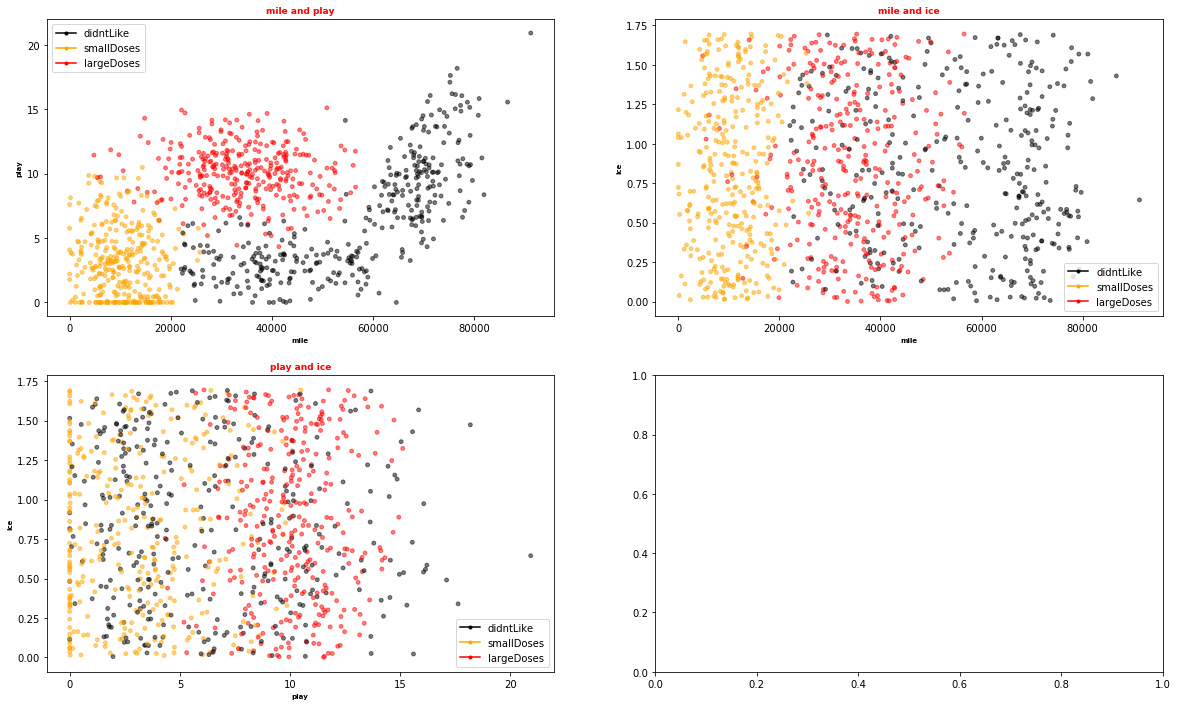

In [65]:
filename = 'datingTestSet.txt'
datingDataMat, datingLabels = file2matrix(filename)
showdatas(datingDataMat, datingLabels)

In [50]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [51]:
datingDataMat.max(0)

array([  9.12730000e+04,   2.09193490e+01,   1.69551700e+00])

In [52]:
normMat, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
[  9.12730000e+04   2.09193490e+01   1.69436100e+00]
[ 0.        0.        0.001156]


In [58]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [59]:
x = np.array([[3, 1, 2], [5, 2, 1]])

In [60]:
x

array([[3, 1, 2],
       [5, 2, 1]])

In [61]:
x.argsort()

array([[1, 2, 0],
       [2, 1, 0]], dtype=int64)

In [63]:
hoRatio = 0.1
m = normMat.shape[0]
numTestVecs = int(m * hoRatio)
errorCount = 0.0
for i in range(numTestVecs):
    classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 4)
    print('result: %d\ttrue class: %d' %(classifierResult, datingLabels[i]))
    if classifierResult != datingLabels[i]:
        errorCount += 1
print('error rate: %f%%' %(errorCount / float(numTestVecs) * 100))

result: 3	true class: 3
result: 2	true class: 2
result: 1	true class: 1
result: 1	true class: 1
result: 1	true class: 1
result: 1	true class: 1
result: 3	true class: 3
result: 3	true class: 3
result: 1	true class: 1
result: 3	true class: 3
result: 1	true class: 1
result: 1	true class: 1
result: 2	true class: 2
result: 1	true class: 1
result: 1	true class: 1
result: 1	true class: 1
result: 1	true class: 1
result: 1	true class: 1
result: 2	true class: 2
result: 3	true class: 3
result: 2	true class: 2
result: 1	true class: 1
result: 2	true class: 2
result: 3	true class: 3
result: 2	true class: 2
result: 3	true class: 3
result: 2	true class: 2
result: 3	true class: 3
result: 2	true class: 2
result: 1	true class: 1
result: 3	true class: 3
result: 1	true class: 1
result: 3	true class: 3
result: 1	true class: 1
result: 2	true class: 2
result: 1	true class: 1
result: 1	true class: 1
result: 2	true class: 2
result: 3	true class: 3
result: 3	true class: 3
result: 1	true class: 1
result: 2	true c